# DAV 6150

# M2: Cross Validating a Linear Regression Model

# 1. Introduction

In [2]:
import pandas as pd
import numpy as np

In [3]:
passager_vehicle = pd.read_csv("https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/M2%3A%20Cross%20Validating%20a%20Linear%20Regression%20Model/src/M2_Data.csv", header=None)
passager_vehicle

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

In [5]:
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 
                'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

passager_vehicle.columns = column_names
passager_vehicle

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# 2. Exploratory Data Analysis

In [22]:
passager_vehicle.shape

(205, 10)

In [7]:
passager_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
passager_vehicle.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
passager_vehicle.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
columns = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'curb-weight']
passager_vehicle = passager_vehicle[columns]
for column in columns:
    passager_vehicle[column] = pd.to_numeric(passager_vehicle[column], errors='coerce')
passager_vehicle

/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_56329/1858165510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passager_vehicle[column] = pd.to_numeric(passager_vehicle[column], errors='coerce')


,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
1,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
2,52.4,65.5,171.2,94.5,152,154.0,5000.0,19,2823
3,54.3,66.2,176.6,99.8,109,102.0,5500.0,24,2337
4,54.3,66.4,176.6,99.4,136,115.0,5500.0,18,2824
...,...,...,...,...,...,...,...,...,...
200,55.5,68.9,188.8,109.1,141,114.0,5400.0,23,2952
201,55.5,68.8,188.8,109.1,141,160.0,5300.0,19,3049
202,55.5,68.9,188.8,109.1,173,134.0,5500.0,18,3012
203,55.5,68.9,188.8,109.1,145,106.0,4800.0,26,3217


In [11]:
passager_vehicle.isnull().sum()

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
curb-weight    0
dtype: int64

Analysis of Selected Automobile Attributes

We are focusing on the following key attributes for our analysis:

| Attribute    | Type      | Description                                               | Range           |
|--------------|-----------|-----------------------------------------------------------|-----------------|
| Height       | Numerical | The height of the vehicle                                 | 47.8 to 59.8    |
| Width        | Numerical | The width of the vehicle                                  | 60.3 to 72.3    |
| Length       | Numerical | The length of the vehicle                                 | 141.1 to 208.1  |
| Wheel-base   | Numerical | The distance between the front and rear wheels            | 86.6 to 120.9   |
| Engine-size  | Numerical | The displacement of the engine                            | 61 to 326       |
| Horsepower   | Numerical | The power output of the engine                            | 48 to 288       |
| Peak-rpm     | Numerical | The maximum revolutions per minute of the engine          | 4150 to 6600    |
| City-mpg     | Numerical | The vehicle's fuel efficiency in urban areas              | 13 to 49        |
| Curb-weight  | Numerical | The weight of the vehicle without passengers or cargo     | 1488 to 4066    |

In [12]:
for column in ['horsepower', 'peak-rpm']:
    mean = passager_vehicle[column].mean(axis=0)
    passager_vehicle[column].replace(np.nan, mean, inplace=True)
    print(f'Mean of {column}: {mean}')

Mean of horsepower: 104.25615763546799
Mean of peak-rpm: 5125.369458128079


/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_56329/2213956269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passager_vehicle[column].replace(np.nan, mean, inplace=True)


In [13]:
passager_vehicle.corr()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
height,1.000000,0.279210,0.491029,0.589435,0.067149,-0.110137,-0.320602,-0.048640,0.295572
width,0.279210,1.000000,0.841118,0.795144,0.735433,0.642195,-0.219859,-0.642704,0.867032
length,0.491029,0.841118,1.000000,0.874587,0.683360,0.554434,-0.287031,-0.670909,0.877728
wheel-base,0.589435,0.795144,0.874587,1.000000,0.569329,0.351957,-0.360704,-0.470414,0.776386
engine-size,0.067149,0.735433,0.683360,0.569329,1.000000,0.810713,-0.244599,-0.653658,0.850594
horsepower,-0.110137,0.642195,0.554434,0.351957,0.810713,1.000000,0.130971,-0.803162,0.750968
peak-rpm,-0.320602,-0.219859,-0.287031,-0.360704,-0.244599,0.130971,1.000000,-0.113723,-0.266283
city-mpg,-0.048640,-0.642704,-0.670909,-0.470414,-0.653658,-0.803162,-0.113723,1.000000,-0.757414
curb-weight,0.295572,0.867032,0.877728,0.776386,0.850594,0.750968,-0.266283,-0.757414,1.000000


<Axes: ylabel='Frequency'>

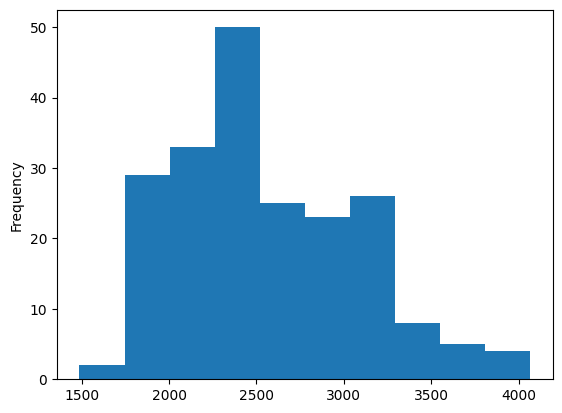

In [14]:
(passager_vehicle['curb-weight']).plot.hist()

In [15]:
passager_vehicle['log-curb-weight'] = np.log(passager_vehicle['curb-weight'] + 1)

/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_56329/2079105550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passager_vehicle['log-curb-weight'] = np.log(passager_vehicle['curb-weight'] + 1)


<Axes: ylabel='Frequency'>

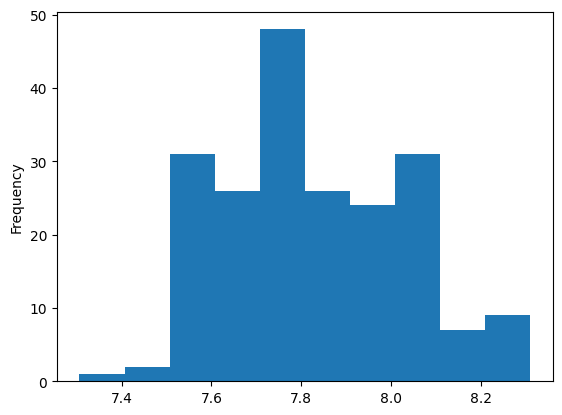

In [16]:
(passager_vehicle['log-curb-weight']).plot.hist()

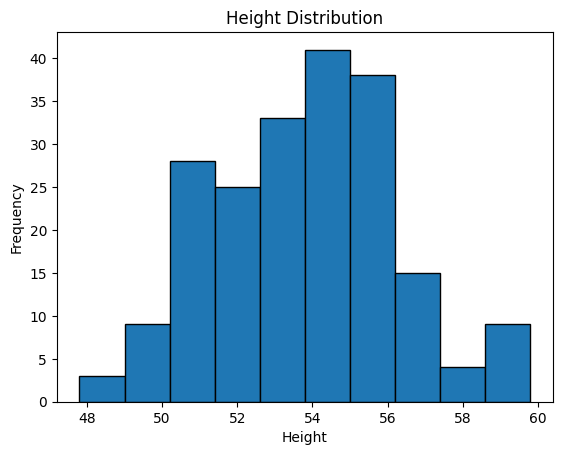

In [57]:
import matplotlib.pyplot as plt

passager_vehicle['height'].plot(kind='hist', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()




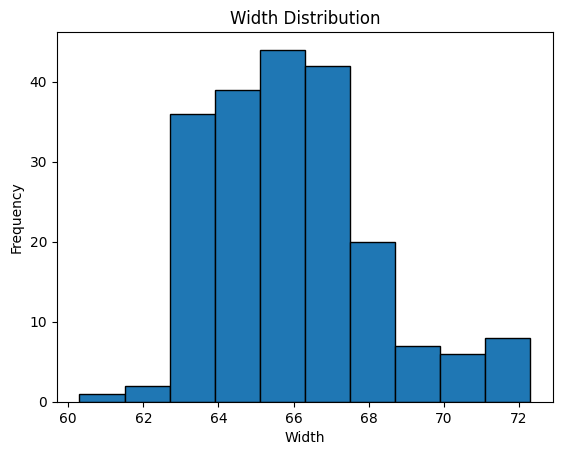

In [58]:
passager_vehicle['width'].plot(kind='hist', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()



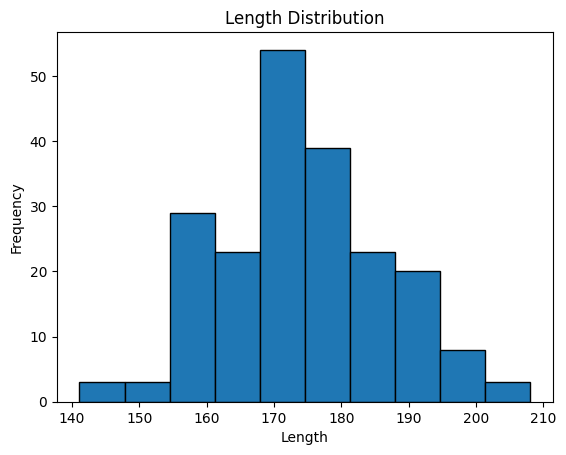

In [59]:
passager_vehicle['length'].plot(kind='hist', edgecolor='black')
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()



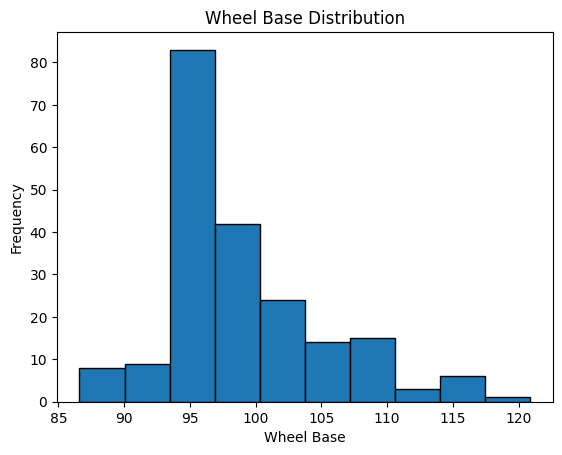

In [61]:
passager_vehicle['wheel-base'].plot(kind='hist', edgecolor='black')
plt.title('Wheel Base Distribution')
plt.xlabel('Wheel Base')
plt.ylabel('Frequency')
plt.show()



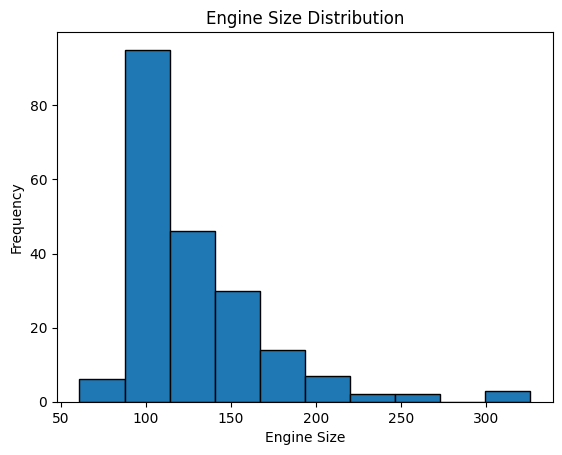

In [62]:
passager_vehicle['engine-size'].plot(kind='hist', edgecolor='black')
plt.title('Engine Size Distribution')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()


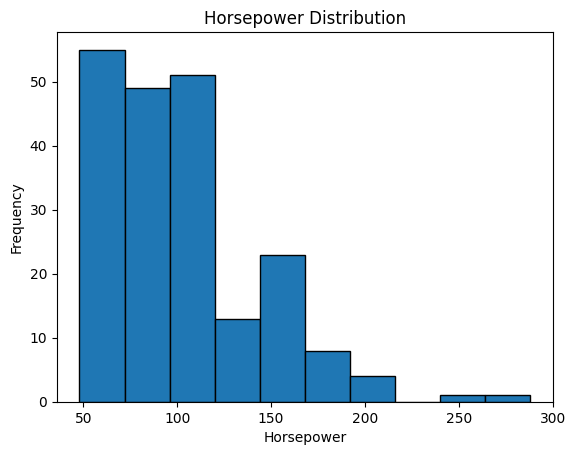

In [63]:
passager_vehicle['horsepower'].plot(kind='hist', edgecolor='black')
plt.title('Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()



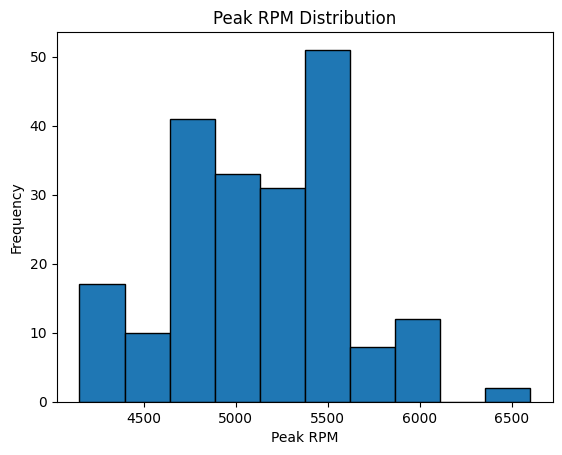

In [64]:
passager_vehicle['peak-rpm'].plot(kind='hist', edgecolor='black')
plt.title('Peak RPM Distribution')
plt.xlabel('Peak RPM')
plt.ylabel('Frequency')
plt.show()


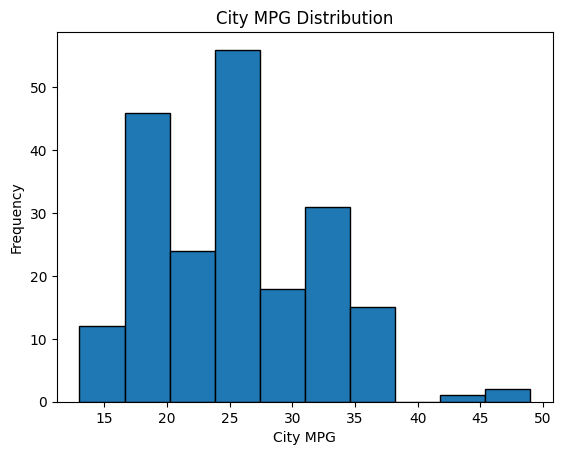

In [65]:
passager_vehicle['city-mpg'].plot(kind='hist', edgecolor='black')
plt.title('City MPG Distribution')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()


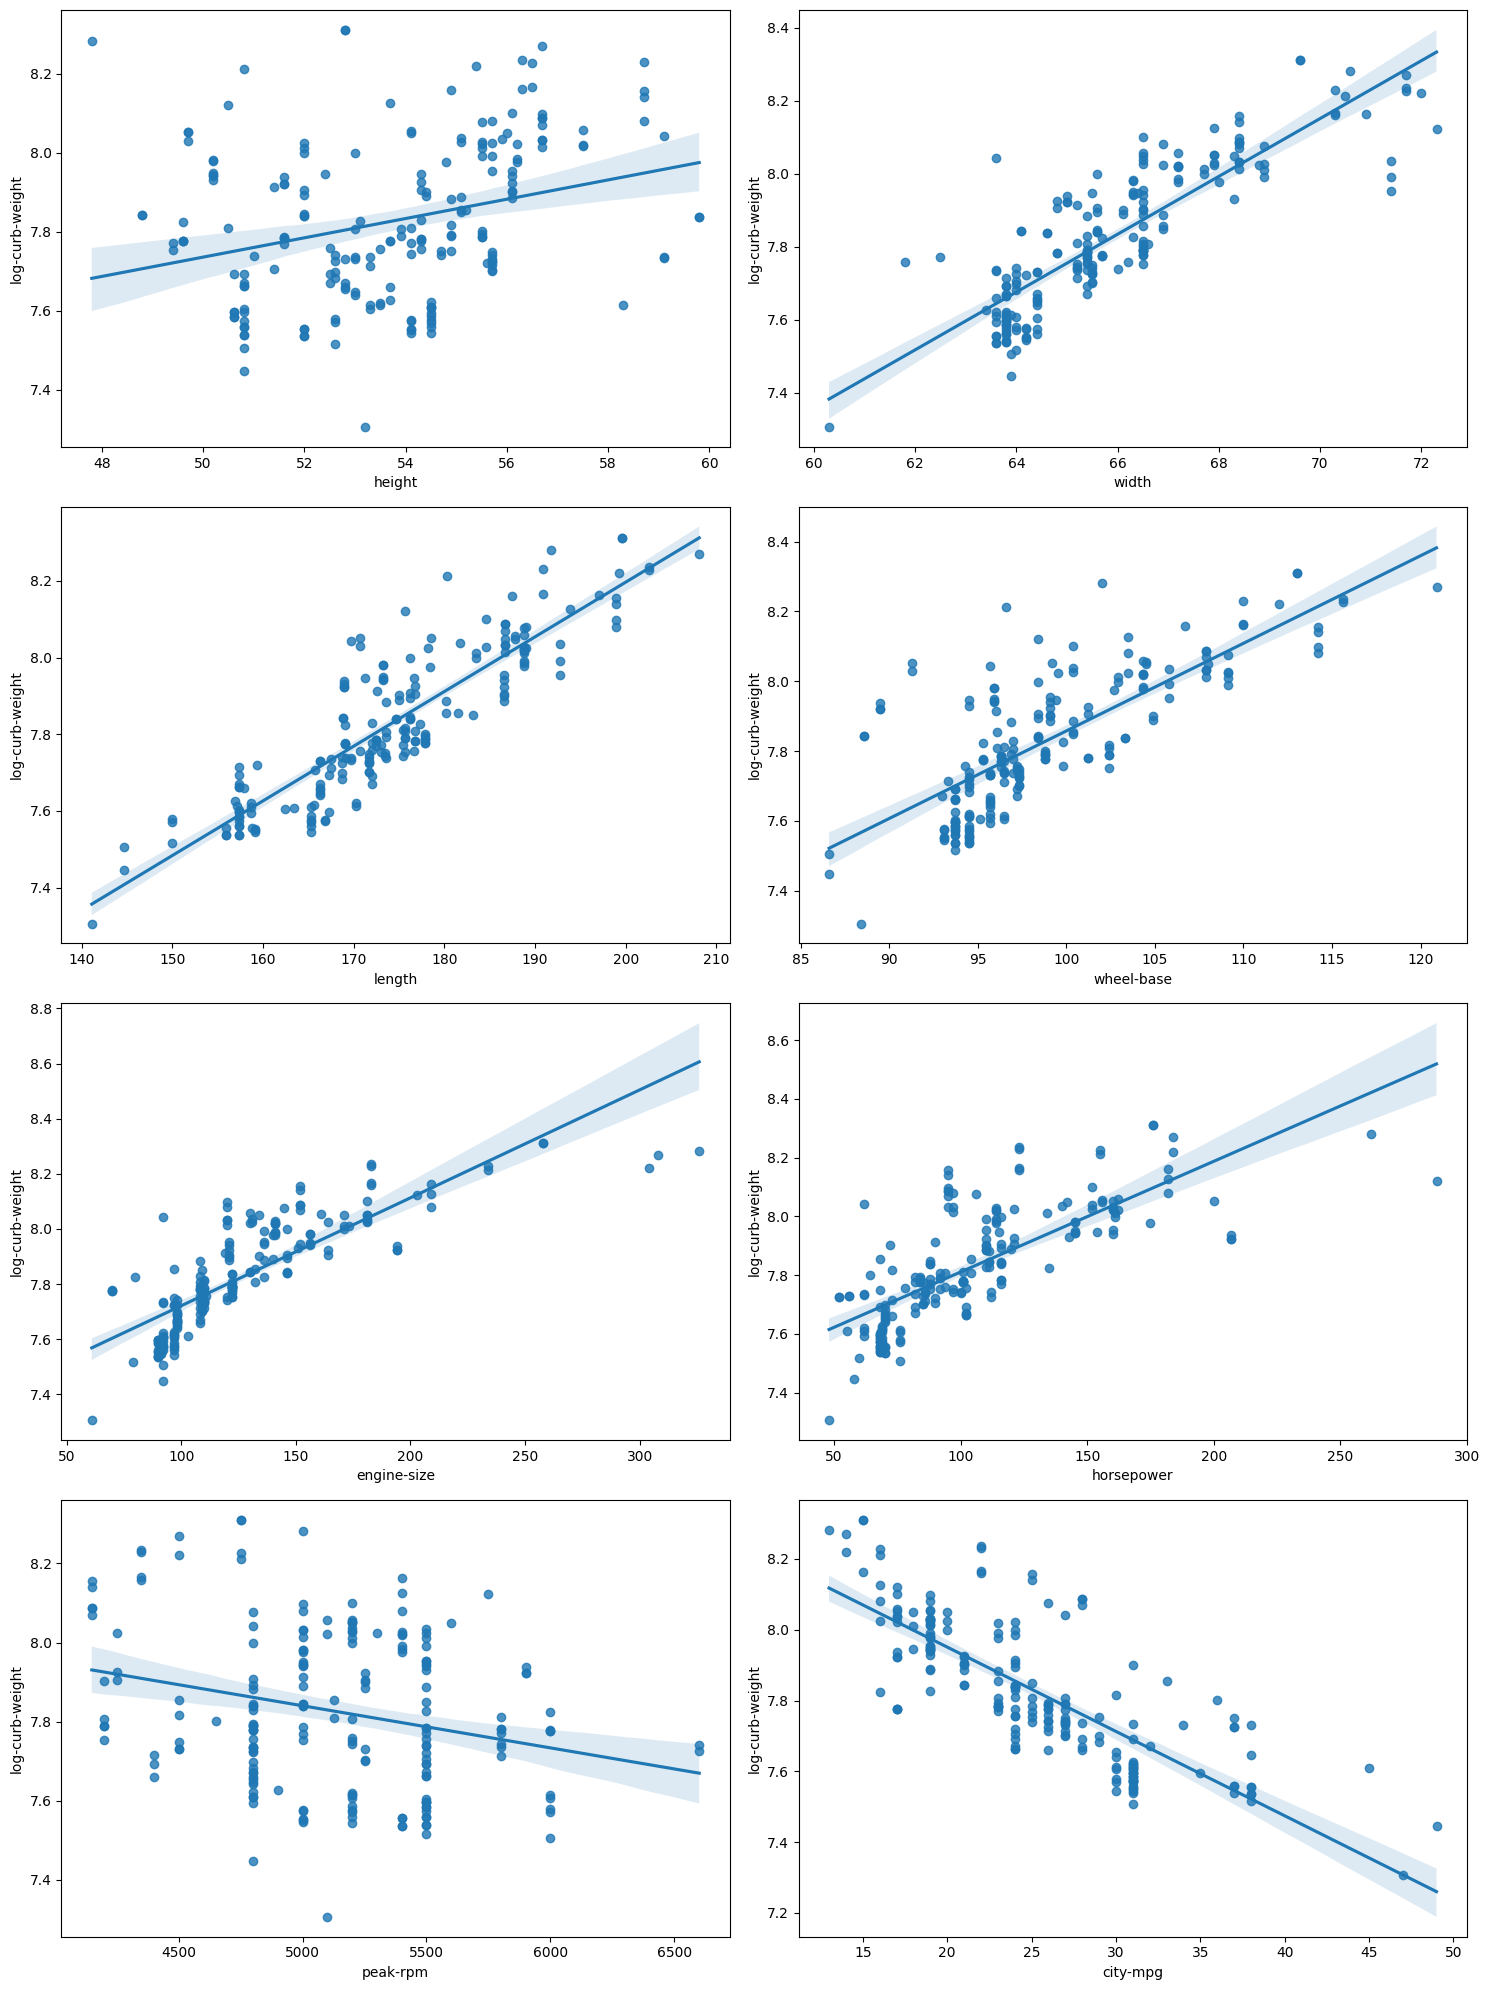

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
num_val = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, f in enumerate(num_val):
    row = i // 2
    col = i % 2 
    sns.regplot(x=f, y='log-curb-weight', data=passager_vehicle, ax=axes[row, col])

plt.tight_layout()
plt.show()

# 3. Regression Model Construction & Evaluation

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [19]:
X = passager_vehicle[['length', 'engine-size', 'horsepower']] 
y = passager_vehicle['log-curb-weight'] 

In [20]:
model1 = LinearRegression()

In [21]:
k = 5
scores_model1 = cross_val_score(model1, X, y, cv=k, scoring='r2')
average_score_model1 = scores_model1.mean()
print(f'Model 1 Average R^2 Score: {average_score_model1}')

Model 1 Average R^2 Score: 0.8448421313429695


# 4. Conclusions